In [33]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import bernoulli
sns.set_theme()
from scipy.stats import norm
geno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
fruit_length_geno = pd.read_table("fruit_length_geno.csv",sep=",")
gwas_plus_pmap = pd.read_table("gwas_plus_pmap.csv",sep=",")
# imports

In [34]:
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "height": fruit_length_geno['height']})
to_model = to_model.loc[pd.isnull(to_model).sum(axis=1)==0, :]
to_model = sm.add_constant(to_model)
# We create a data frame called to model, with three columns. The first being fruit length, the second being height, and the third being a constant.
    # we us isnull to remove any lines that have no value

X = to_model.loc[:,['const','height']]
y = to_model['fruit_length']
model_height = sm.OLS(y, X).fit()
# sets an x and y values that will be used in our linear model then plugs them in
    # our x values will consist of heights (which will change),  and a constand.
    # our y values wil consist of fruit length

gen = model_height.predict()
# we create an array of mean fruit length for a given height.

In [35]:
to_model = pd.concat((to_model, pd.DataFrame({"gen_length":gen})), axis=1)
to_model = to_model.loc[pd.isnull(to_model).sum(axis=1)==0, :]
to_model = sm.add_constant(to_model)
# I add the previous to model to a new one with gen length.
# then remove any lines with nan (With isnull)
# then add a constant

In [36]:
X = to_model.loc[:,['const','height']]
y = to_model['gen_length']
model_gen = sm.OLS(y, X).fit()
# Sets are X values To the constant and height, sets our Y value to generated fruit length.
# Using these 2 X and Y values, we create a model. The model is a best fit line.

model_gen.params
# prints the intercept and slope.

const     14.580532
height     0.005269
dtype: float64

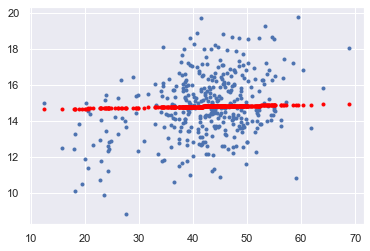

In [37]:
to_model['pred'] = model_gen.predict()
f, ax = plt.subplots(1)
ax.plot( to_model['height'], to_model['fruit_length'],'.')
ax.plot( to_model['height'], to_model['pred'],'.', color='red')
# The above code designs, a scatterplot, with two plots one red. The first scatterplot is the normal fruit length values against height, the second scatterplot compares our predicted values to height. The two are superimposed.

In [38]:
# The red line, which is a scatter plot of the generated fruit lengths compared to height is a best fit line for the blue scatter plot of fruit length.